In [68]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
# necessary for the plot to appear in a Jupyter
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline

from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf

Populating the interactive namespace from numpy and matplotlib


In [69]:

#PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP500PR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP500HR.csv")

#PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP17NewsAgHR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/TOP17NewsAgHR.csv")

PR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/weighted_newsPR.csv")
#HR = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/weighted_newsHR.csv")


#RT = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/weighted_newsRAW.csv")
#FT = pd.read_csv("//home/ostapkharysh/Documents/bt_data/DescriptiveFebruary29June05_2016/weighted_newsFIN.csv")

In [70]:
# This is data set of previously financially filtered data.Empty 
# tone suggests that at that time no financial info was available about such so the value is 0
PR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = PR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
#HR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = HR[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
#RT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = RT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)
#FT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]] = FT[["tone", "negative", "polarity", "positive", "self_den", "activ_den"]].fillna(0)

In [71]:
PR = PR[PR.fin_return.notnull()].reset_index(drop =True)

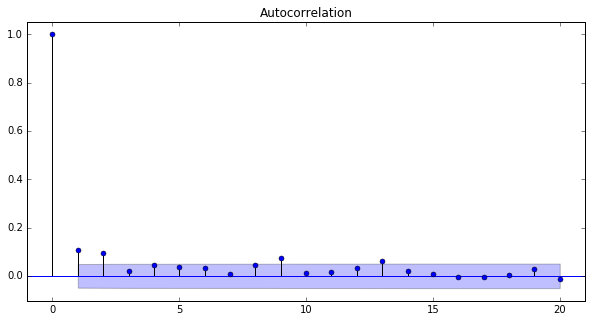

In [72]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
plot_acf([x**2 for x in PR.tone], lags=20)
pyplot.show()

In [75]:
print(adfuller(PR.tone))
diff_tn = PR.tone.diff(1)
PR.tone = diff_tn
PR = PR[1:]
PR.reset_index(drop=True)
adfuller(PR.tone)

(-16.15748679228544, 4.50207157108419e-29, 25, 1579, {'10%': -2.5677454141697496, '1%': -3.4344981713985487, '5%': -2.863372170679779}, 6515.530164422893)


(-19.337339854343053,
 0.0,
 25,
 1578,
 {'1%': -3.4345008044458614,
  '10%': -2.56774603301736,
  '5%': -2.8633733328409368},
 6739.192911867354)

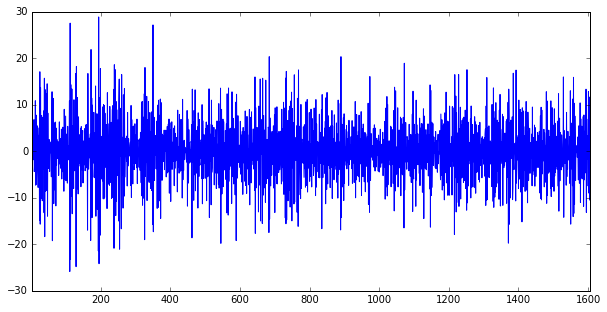

In [76]:
PR.tone.plot()

In [125]:
spl = 10
train, test = PR[:-spl].tone.values, PR[-spl:].tone.values

In [126]:
model = arch_model(train, mean='Zero', vol='ARCH', p=1)

In [127]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      4,   Neg. LLF: 5229.647382104851
Iteration:      2,   Func. Count:     10,   Neg. LLF: 5229.610626465275
Iteration:      3,   Func. Count:     14,   Neg. LLF: 5229.242871929335
Iteration:      4,   Func. Count:     18,   Neg. LLF: 5229.173884496195
Iteration:      5,   Func. Count:     22,   Neg. LLF: 5229.173325210649
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5229.173324483907
            Iterations: 5
            Function evaluations: 23
            Gradient evaluations: 5


In [128]:
yhat = model_fit.forecast(horizon=spl)

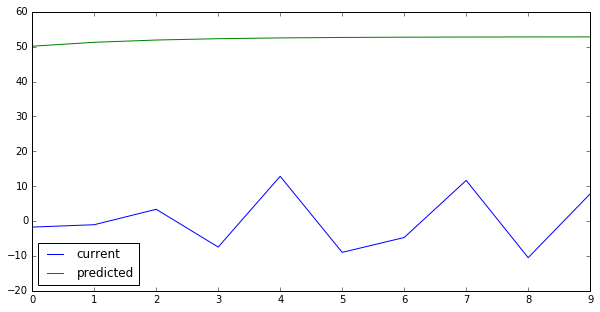

In [138]:
plt.plot(test, label='current')
plt.plot(yhat.variance.values[-1, :], label='predicted')
plt.legend(loc='best')
plt.show()